In [2]:
import torch
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib

In [3]:
data_path = '/local/nlp/milad/code/xl-vlms/data/painting-form/results/decompose_activations_text_grounding_image_grounding_results_train.pth'

In [4]:
results_dict = torch.load(data_path)
print(results_dict.keys())

concepts = results_dict['concepts']
activations = results_dict['activations']
text_grounding = results_dict['text_grounding']
image_paths = results_dict['image_grounding_paths']
print (f"Concepts shape: {concepts.shape}", f"Activations shape: {activations.shape}")
num_concepts = concepts.shape[0]

dict_keys(['concepts', 'activations', 'decomposition_method', 'text_grounding', 'image_grounding_paths', 'analysis_model'])
Concepts shape: torch.Size([10, 4096]) Activations shape: torch.Size([48, 10])


In [24]:
def visualize_grounding(concept_idx, text_grounding, image_paths):
    words = text_grounding[concept_idx]
    paths = image_paths[concept_idx]
    num_imgs = len(paths)
    images = []
    for path in paths:
        res = np.array(Image.open(path))
        img = Image.fromarray(res.astype(np.uint8))  # Convert to uint8 before creating the image
        cur_img = np.array(img.resize([256, 256]))
        images.append(cur_img)
    width = num_imgs*2+0.1
    fig = plt.figure(figsize=(width, width/5))
    for i in range(num_imgs):
        fig.add_subplot(1, num_imgs, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    fig.suptitle('Concept ' + str(concept_idx) + ': ' + str(words)) 

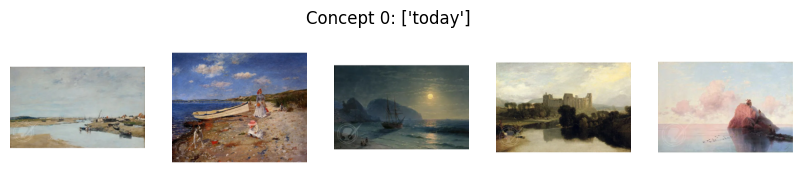

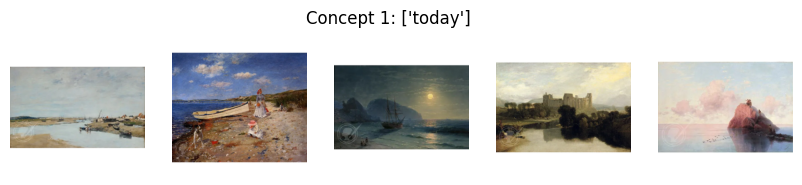

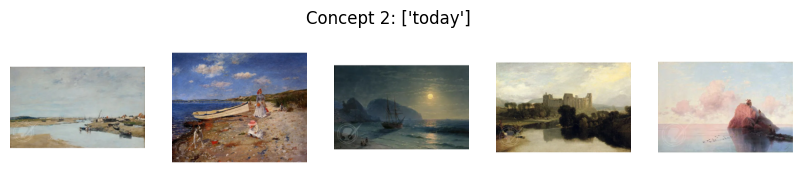

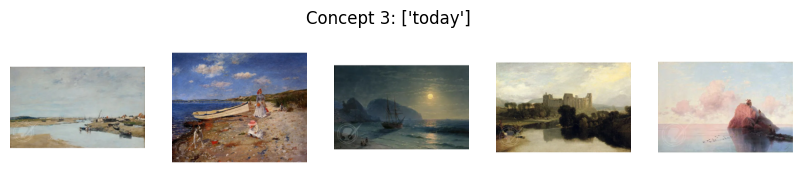

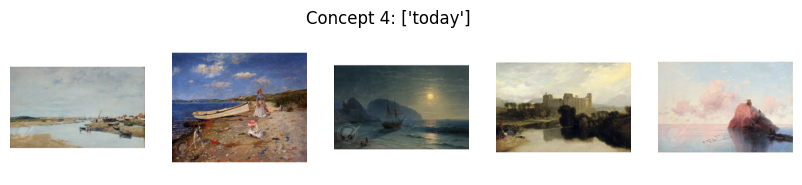

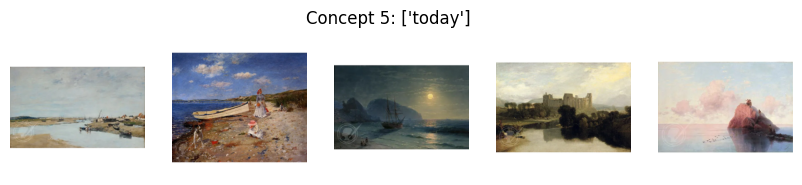

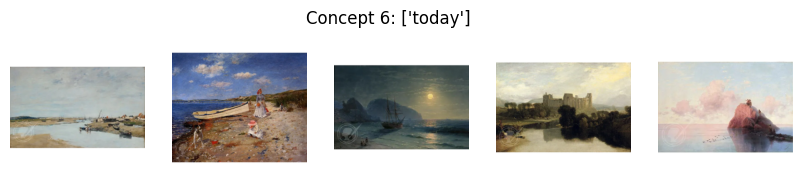

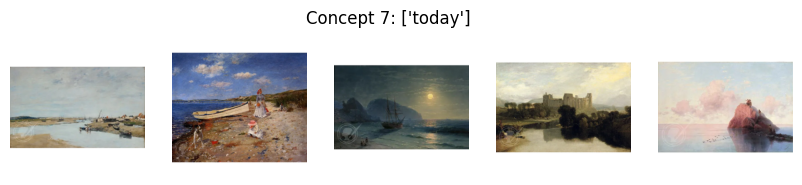

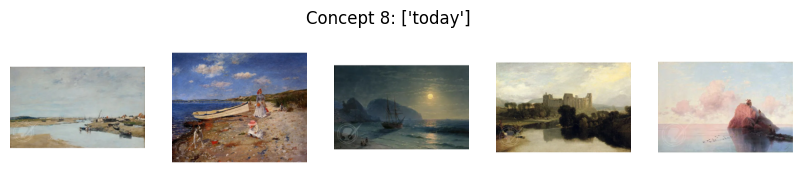

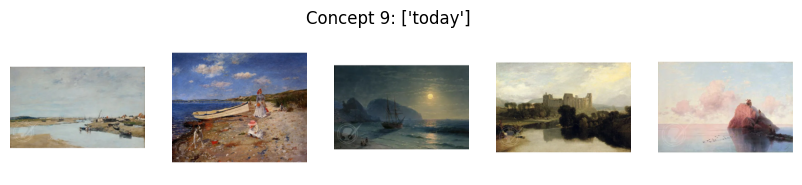

In [25]:
for k in range(num_concepts):
    visualize_grounding(k, text_grounding, image_paths)